Final Project!

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import geopandas as gpd
import shapely
from shapely.geometry import Point
import skmob
from skmob.measures.individual import jump_lengths
from skmob.tessellation import tilers
from skmob.preprocessing import detection, clustering
from skmob.preprocessing import filtering
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import os

In [2]:
os.chdir('/Users/katielark/Downloads/')
crime = pd.read_csv("Crimes_-_2001_to_Present_20241203.csv")

Data Inspection and Pre-Processing

In [3]:
crime

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8210894,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,831,8.0,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
8210895,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,633,6.0,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
8210896,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1134,11.0,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
8210897,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,2413,24.0,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [4]:
crime.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
crime.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
crime.isna().sum()

ID                           0
Case Number                  0
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description     13790
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614830
Community Area          613456
FBI Code                     0
X Coordinate             90238
Y Coordinate             90238
Year                         0
Updated On                   0
Latitude                 90238
Longitude                90238
Location                 90238
dtype: int64

In [7]:
crime.dropna(how='any', inplace=True)
#only inspecting crime for which we know the general location

In [8]:
crime = crime[crime['Latitude'] > 37] 
#eliminating erroneous data points that fall outside Chicago city limits

In [9]:
crime["month_str"] = crime["Date"].str[:2] + crime["Date"].str[5:10]
crime['Date'] = pd.to_datetime(crime['Date'])
crime['month'] = crime["Date"].dt.month_name()
crime['time'] = crime["Date"].dt.hour
crime.head()
#converting and breaking apart time variables

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/56476987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime["month_str"] = crime["Date"].str[:2] + crime["Date"].str[5:10]
/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/56476987.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['Date'] = pd.to_datetime(crime['Date'])
/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/56476987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month_str,month,time
11,12045583,JD226426,2020-05-07 10:24:00,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,212,2.0,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)",05/2020,May,10
12,12031001,JD209965,2020-04-16 05:00:00,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,915,9.0,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)",04/2020,April,5
13,12093529,JD282112,2020-07-01 10:16:00,081XX S COLES AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422,4.0,7.0,46.0,04A,1198234.0,1851595.0,2020,07/08/2020 03:41:45 PM,41.747610,-87.549179,"(41.747609555, -87.549179329)",07/2020,July,10
14,12178140,JD381597,2020-09-27 23:29:00,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,7.0,15.0,67.0,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)",09/2020,September,23
15,4144897,HL474854,2005-07-10 15:00:00,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,7.0,16.0,68.0,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)",07/2005,July,15


In [10]:
crime['Arrest'].sum()
#

1888410

Useful functions!

In [11]:
def find_outliers(df, column):
    mean = column.mean()
    std = column.std()
    lower = mean - std*3
    upper = mean + std*3
    outliers = df[(column < lower) | (column > upper)]
    return outliers

In [12]:
def identify_outliers_details(df):
    outliers_details = []

    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']: 
            column_data = df[column].dropna()
            
            mean = column_data.mean()
            std = column_data.std()

            lower_bound = mean - (3 * std)
            upper_bound = mean + (3 * std)

            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

            for index, value in outliers[column].items():
                if value > upper_bound:
                    outlier_position = 'Above Upper'
                else:
                    outlier_position = 'Below Lower'
                outliers_details.append({'Row Index': index, 'Column Name': column, 'Outlier Value': value, 'Outlier Position': outlier_position})

    outliers_df = pd.DataFrame(outliers_details)
    return outliers_df
#chatgpt helped in crafting this code

Exmining Crime Type

In [13]:
crime['Primary Type'].nunique()

35

In [14]:
crime['Primary Type'].unique()

array(['THEFT', 'BATTERY', 'ASSAULT', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER', 'BURGLARY',
       'NARCOTICS', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'DECEPTIVE PRACTICE', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL TRESPASS', 'ROBBERY', 'SEX OFFENSE',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING',
       'LIQUOR LAW VIOLATION', 'INTIMIDATION', 'CRIM SEXUAL ASSAULT',
       'OBSCENITY', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'RITUALISM',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [15]:
#creating a reference map- may be useful in the future
types_list =  [str(i).zfill(2) for i in range(1,1+crime['Primary Type'].unique().shape[0])] 
types_map = dict(zip(crime['Primary Type'].unique(), types_list)) 
def types_lookup(types,types_map): 
    return next(key for key, value in types_map.items() if value == types)

In [16]:
crime['types'] = crime['Primary Type'].map(types_map)

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/174834945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['types'] = crime['Primary Type'].map(types_map)


In [17]:
crime.groupby("Primary Type").count().sort_values(by="ID",ascending=False)

,ID,Case Number,Date,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,month_str,month,time,types
Primary Type,,,,,,,,,,,,,,,,,,,,,,,,,
THEFT,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099,1596099
BATTERY,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616,1373616
CRIMINAL DAMAGE,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521,859521
NARCOTICS,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067,678067
ASSAULT,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604,503604
OTHER OFFENSE,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592,466592
BURGLARY,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052,403052
MOTOR VEHICLE THEFT,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844,379844
DECEPTIVE PRACTICE,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152,327152


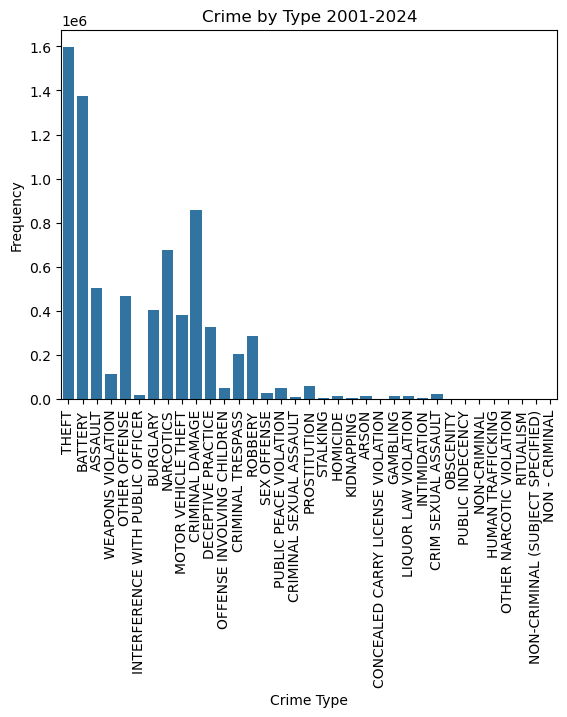

In [18]:
sns.countplot(x = crime['Primary Type'])
plt.title('Crime by Type 2001-2024')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [19]:
type_arrest = crime.groupby('Primary Type').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
type_arrest['pc_arrests'] = type_arrest['total_arrests'] / type_arrest['total_cases']
type_arrest.sort_values(by='pc_arrests', ascending=False)

,Primary Type,total_cases,total_arrests,pc_arrests
26,PROSTITUTION,61741,61452,0.995319
18,NARCOTICS,678067,673507,0.993275
10,GAMBLING,13438,13345,0.993079
16,LIQUOR LAW VIOLATION,13092,12960,0.989918
27,PUBLIC INDECENCY,196,192,0.979592
4,CONCEALED CARRY LICENSE VIOLATION,1396,1347,0.964900
13,INTERFERENCE WITH PUBLIC OFFICER,18849,17364,0.921216
22,OBSCENITY,825,626,0.758788
34,WEAPONS VIOLATION,113755,81913,0.720083
8,CRIMINAL TRESPASS,203684,138324,0.679111


In [20]:
#creating subset of narcotics-related crimes for comparison
drugz = crime[(crime['Primary Type'] == 'NARCOTICS') | (crime['Primary Type'] == 'OTHER NARCOTIC VIOLATION')]

In [21]:
crime.groupby("Year").nunique()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude,Location,month_str,month,time,types
Year,,,,,,,,,,,,,,,,,,,,,,,,,
2001,3897,3883,2740,3248,134,25,134,94,2,2,285,22,50,77,25,3611,3649,355,3743,3744,3744,12,12,24,25
2002,345043,345030,141526,27816,316,30,309,122,2,2,285,23,50,78,26,54594,80432,57,159151,159120,159192,12,12,24,30
2003,471995,471961,184497,28956,332,30,325,130,2,2,290,24,50,78,26,58268,88656,63,196865,196835,196929,12,12,24,30
2004,467139,467128,181433,28905,325,30,316,126,2,2,287,24,50,78,26,58032,88467,76,194784,194739,194839,12,12,24,30
2005,449878,449870,187254,29023,330,30,319,113,2,2,290,23,50,78,26,57778,87993,68,191389,191354,191443,12,12,24,30
2006,445514,445495,186957,28857,341,30,332,121,2,2,288,23,50,78,26,57538,87744,76,190853,190821,190915,12,12,24,30
2007,435547,435529,183532,28871,333,30,328,120,2,2,291,23,50,78,25,57595,87404,83,189361,189325,189417,12,12,24,30
2008,419637,419613,173023,28847,331,29,325,123,2,2,295,23,50,78,25,57608,86520,139,186623,186604,186687,12,12,24,29
2009,385753,385734,142172,28638,321,29,319,130,2,2,298,23,50,78,25,57046,84825,167,179217,179195,179276,12,12,24,29


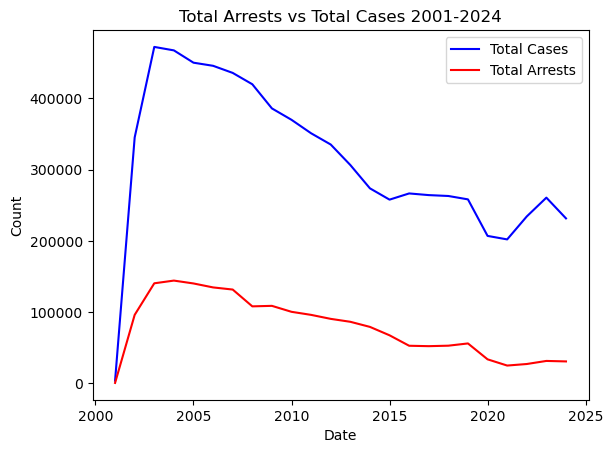

In [22]:
#crime trends over years
crime_year = crime.groupby('Year').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'), 
    distinct_areas = ('Community Area', 'nunique'),
    distinct_months = ('month', 'nunique')
).reset_index()
crime_year['pc_arrests'] = crime_year['total_arrests'] / crime_year['total_cases']
crime_year
plt.plot(crime_year['Year'], crime_year['total_cases'], label='Total Cases', color='blue', markersize=6)
plt.plot(crime_year['Year'], crime_year['total_arrests'], label='Total Arrests', color='red', markersize=6)

plt.title('Total Arrests vs Total Cases 2001-2024')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

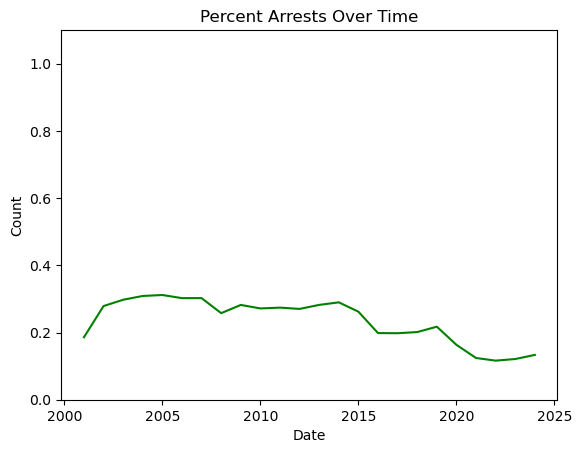

In [57]:
plt.plot(crime_year['Year'], crime_year['pc_arrests'], label='Percent Arrests', color='green', markersize=6)
plt.title('Percent Arrests Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.ylim(0, 1.1)
plt.show()

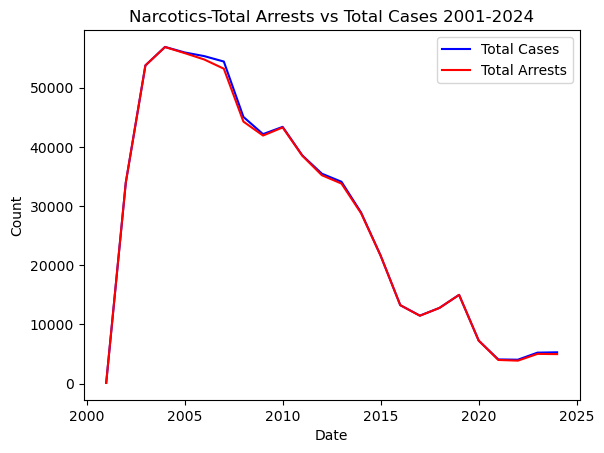

In [24]:
#drugs trends over years
drugz_year = drugz.groupby('Year').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'), 
    distinct_areas = ('Community Area', 'nunique'),
    distinct_months = ('month', 'nunique')
).reset_index()

drugz_year['pc_arrests'] = drugz_year['total_arrests'] / drugz_year['total_cases']
drugz_year

plt.plot(drugz_year['Year'], drugz_year['total_cases'], label='Total Cases', color='blue', markersize=6)
plt.plot(drugz_year['Year'], drugz_year['total_arrests'], label='Total Arrests', color='red', markersize=6)

plt.title('Narcotics-Total Arrests vs Total Cases 2001-2024')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

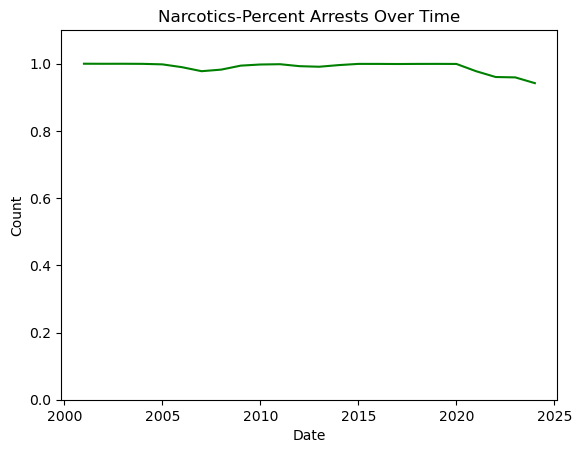

In [25]:
plt.plot(drugz_year['Year'], drugz_year['pc_arrests'], label='Percent Arrests', color='green', markersize=6)
plt.title('Narcotics-Percent Arrests Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
#examining the cases without arrests
drugz_free = drugz[drugz['Arrest']==False]

In [ ]:
drugz_free['Community Area'].nunique()

In [ ]:
drugz_free.sort_values(by='Date')

In [ ]:
drugz_arrests = drugz.groupby('Community Area').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'), 
).reset_index()
drugz_arrests['pc_arrests'] = drugz_arrests['total_arrests'] / drugz_arrests['total_cases']
drugz_arrests

In [26]:
#crime trends across space
crime_area = crime.groupby('Community Area').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'), 
).reset_index()
crime_area['pc_arrests'] = crime_area['total_arrests'] / crime_area['total_cases']
crime_area['total_cases'].describe()
find_outliers(crime_area, crime_area['total_cases'])
crime_area['total_arrests'].describe()
find_outliers(crime_area, crime_area['total_arrests'])
crime_area['pc_arrests'].describe()
find_outliers(crime_area, crime_area['pc_arrests'])

,Community Area,total_cases,total_arrests,pc_arrests
26,26.0,139936,59574,0.425723


In [27]:
crime_area_type = pd.pivot_table(crime, values='ID', index=['Community Area'], columns=['Primary Type'], aggfunc="nunique")

In [28]:
#identifying community area outliers for specific types of crimes
area_outliers = identify_outliers_details(crime_area_type)

In [29]:
area_outliers.sort_values(by='Row Index')

,Row Index,Column Name,Outlier Value,Outlier Position
31,6.0,OTHER NARCOTIC VIOLATION,17.0,Above Upper
27,8.0,NON-CRIMINAL,15.0,Above Upper
12,8.0,DECEPTIVE PRACTICE,26461.0,Above Upper
10,8.0,CRIMINAL TRESPASS,14332.0,Above Upper
8,8.0,CRIMINAL SEXUAL ASSAULT,679.0,Above Upper
20,8.0,LIQUOR LAW VIOLATION,688.0,Above Upper
41,8.0,THEFT,110038.0,Above Upper
35,8.0,PUBLIC INDECENCY,19.0,Above Upper
24,23.0,NARCOTICS,50834.0,Above Upper
21,24.0,LIQUOR LAW VIOLATION,697.0,Above Upper


In [30]:
#drugs trends across space
drugz_area = drugz.groupby('Community Area').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'), 
).reset_index()
drugz_area['pc_arrests'] = drugz_area['total_arrests'] / drugz_area['total_cases']
drugz_area['total_cases'].describe()
find_outliers(drugz_area, drugz_area['total_cases'])
drugz_area['total_arrests'].describe()
find_outliers(drugz_area, drugz_area['total_arrests'])
drugz_area['pc_arrests'].describe()
find_outliers(drugz_area, drugz_area['pc_arrests'])
#below

,Community Area,total_cases,total_arrests,pc_arrests
36,36.0,1043,996,0.954938
50,50.0,1462,1399,0.956908
54,54.0,2050,1969,0.960488


In [31]:
#looking block by block
crime_block = crime.groupby(['Community Area', 'Block', 'Primary Type']).agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
crime_block['pc_arrests'] = crime_block['total_arrests'] / crime_block['total_cases']
crime_block

,Community Area,Block,Primary Type,total_cases,total_arrests,pc_arrests
0,0.0,0000X N LAKEFRONT DR,BATTERY,1,0,0.000000
1,0.0,0000X S LAKEFRONT DR,MOTOR VEHICLE THEFT,2,0,0.000000
2,0.0,0000X S LAKEFRONT DR,THEFT,3,0,0.000000
3,0.0,050XX N CUMBERLAND AVE,ASSAULT,2,0,0.000000
4,0.0,050XX N CUMBERLAND AVE,BATTERY,3,0,0.000000
...,...,...,...,...,...,...
466818,77.0,063XX N WINTHROP AVE,THEFT,103,5,0.048544
466819,77.0,063XX N WINTHROP AVE,WEAPONS VIOLATION,1,1,1.000000
466820,77.0,063XX N Wayne Ave,THEFT,1,0,0.000000
466821,77.0,063XX N Winthrop AVE,THEFT,1,0,0.000000


In [32]:
outlier_data = []

for crime_type in crime_block['Primary Type'].unique():
    crime_subset = crime_block[crime_block['Primary Type'] == crime_type]
    outliers = find_outliers(crime_subset, crime_subset['total_cases'])
    for block in outliers.index:
        outlier_data.append({
            'block': crime_subset.loc[block, 'Block'],
            'crime_type': crime_subset.loc[block, 'Primary Type'],
            'total_arrests': crime_subset.loc[block, 'total_arrests'],
            'total_cases': crime_subset.loc[block, 'total_cases'],
            'pc_arrests': crime_subset.loc[block, 'pc_arrests'],
            'community_area' : crime_subset.loc[block, 'Community Area']
     })

crime_outliers_df = pd.DataFrame(outlier_data)

In [33]:
crime_blocks_geo = crime[crime['Block'].isin(crime_outliers_df['block'])]

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/4247203023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_blocks_geo['geometry'] = crime_blocks_geo.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/4247203023.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20', len(unique_types))


Text(147.2748391337713, 0.5, 'Latitude')

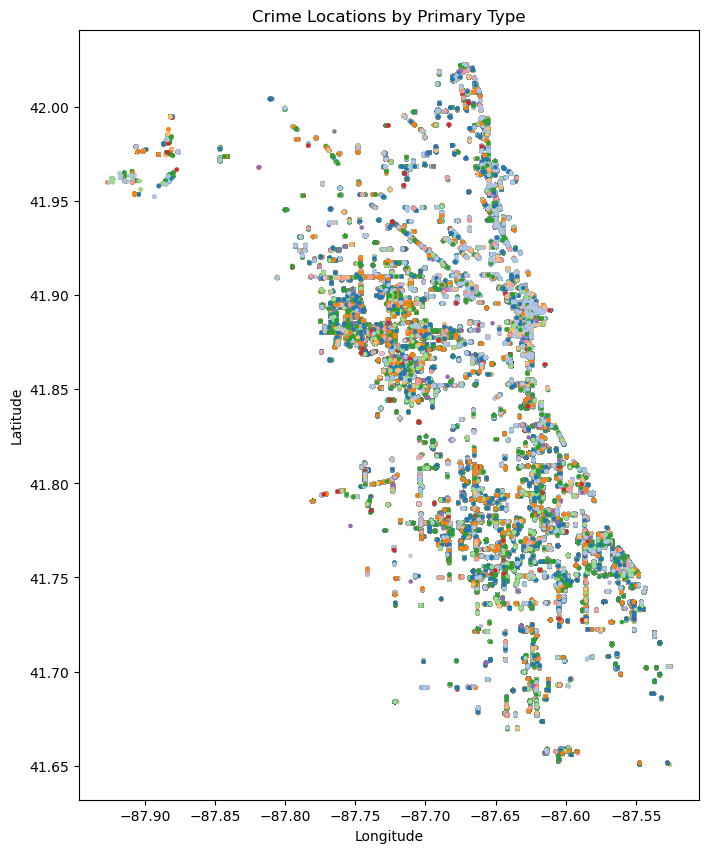

In [36]:
#looking for crime hotspots by type of crime
crime_blocks_geo['geometry'] = crime_blocks_geo.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(crime_blocks_geo, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

unique_types = gdf['Primary Type'].unique()
cmap = plt.cm.get_cmap('tab20', len(unique_types)) 

type_to_color = {primary_type: cmap(i) for i, primary_type in enumerate(unique_types)}

fig, ax = plt.subplots(figsize=(10, 10))

gdf['color'] = gdf['Primary Type'].map(type_to_color)

gdf.plot(ax=ax, color=gdf['color'], markersize=5, label='Crime Locations')

ax.set_title('Crime Locations by Primary Type')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

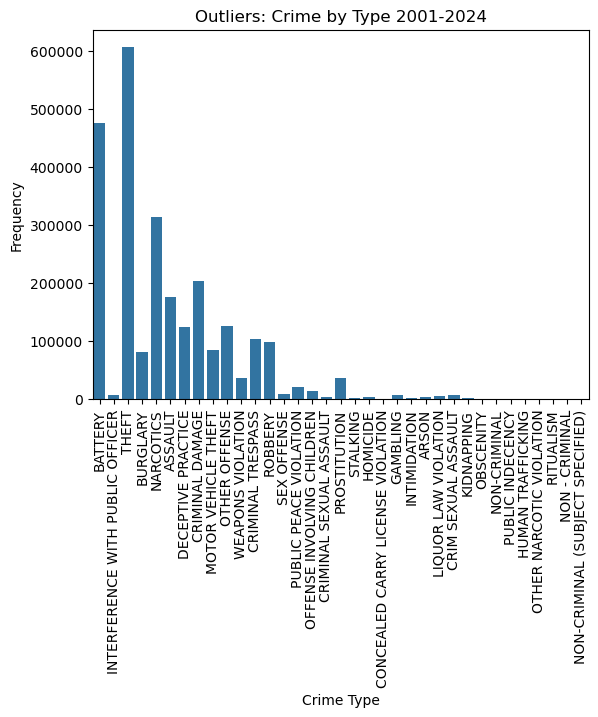

In [37]:
sns.countplot(x = crime_blocks_geo['Primary Type'])
plt.title('Outliers: Crime by Type 2001-2024')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

In [38]:
drug_blocks = crime_outliers_df[crime_outliers_df['crime_type']== 'NARCOTICS']

In [39]:
drug_blocks_geo = crime[crime['Block'].isin(drug_blocks['block'])]

In [40]:
drug_blocks_geo['Primary Type'].nunique()

35

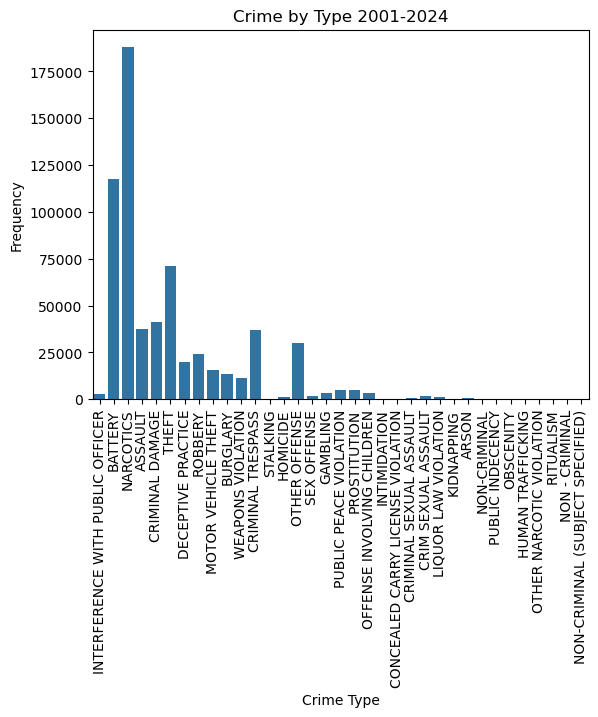

In [41]:
#what other crimes accompany narcotics hotspots? 
sns.countplot(x = drug_blocks_geo['Primary Type'])
plt.title('Crime by Type 2001-2024')
plt.xlabel('Crime Type')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

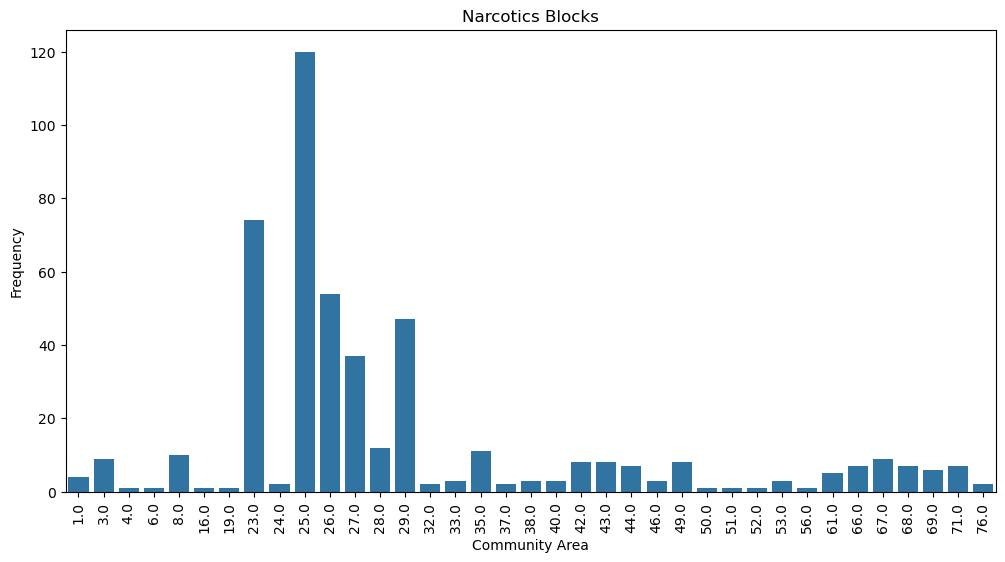

In [42]:
#do some community areas have more hotspots than others? 
plt.figure(figsize=(12, 6)) 
sns.countplot(x = drug_blocks['community_area'])
plt.title('Narcotics Blocks')
plt.xlabel('Community Area')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/1089804372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_blocks_geo['geometry'] = drug_blocks_geo.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)


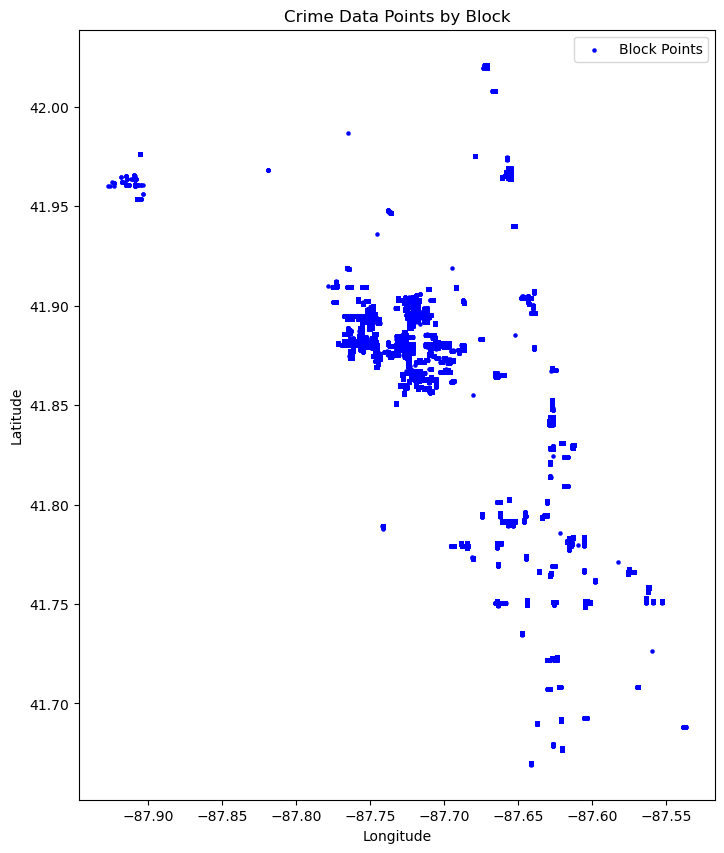

In [43]:
drug_blocks_geo['geometry'] = drug_blocks_geo.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(drug_blocks_geo, geometry='geometry')
gdf.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', markersize=5, label='Block Points')
ax.set_title('Crime Data Points by Block')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend()
plt.show()

/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/2991097689.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime['month'] = pd.Categorical(crime['month'], categories=month_order, ordered=True)
/var/folders/00/yzv7lrx12xq5_g14dw7m_2180000gn/T/ipykernel_16678/2991097689.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crime_month = crime.groupby('month').agg(


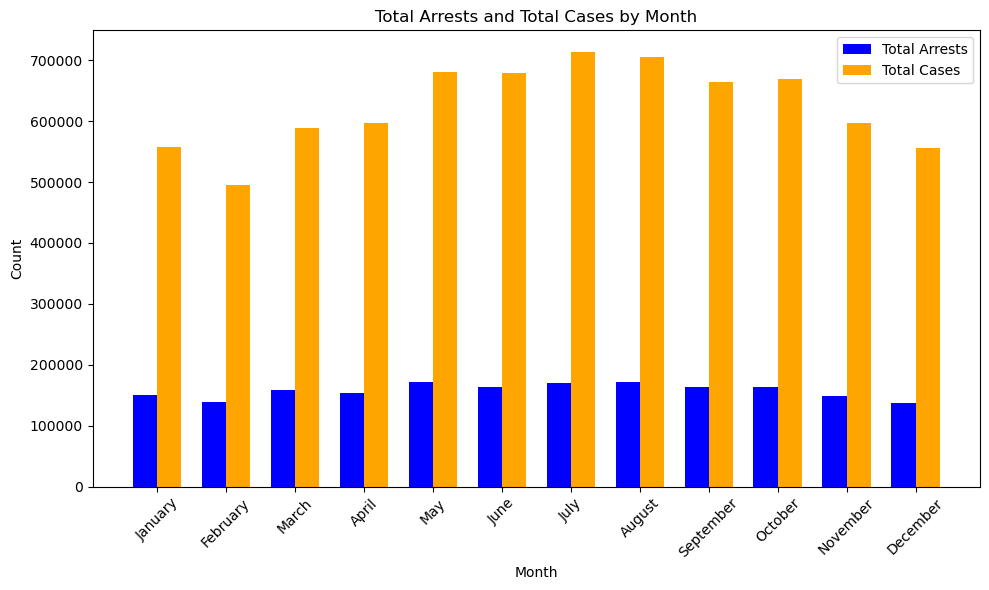

In [44]:
#cyclical/annual crime trends
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
crime['month'] = pd.Categorical(crime['month'], categories=month_order, ordered=True)
crime_month = crime.groupby('month').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
crime_month['pc_arrests'] = crime_month['total_arrests'] / crime_month['total_cases']
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(crime_month))

ax.bar(index, crime_month['total_arrests'], bar_width, label='Total Arrests', color='blue')
ax.bar([i + bar_width for i in index], crime_month['total_cases'], bar_width, label='Total Cases', color='orange')

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Total Arrests and Total Cases by Month')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(crime_month['month'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#chatgpt helped craft this code

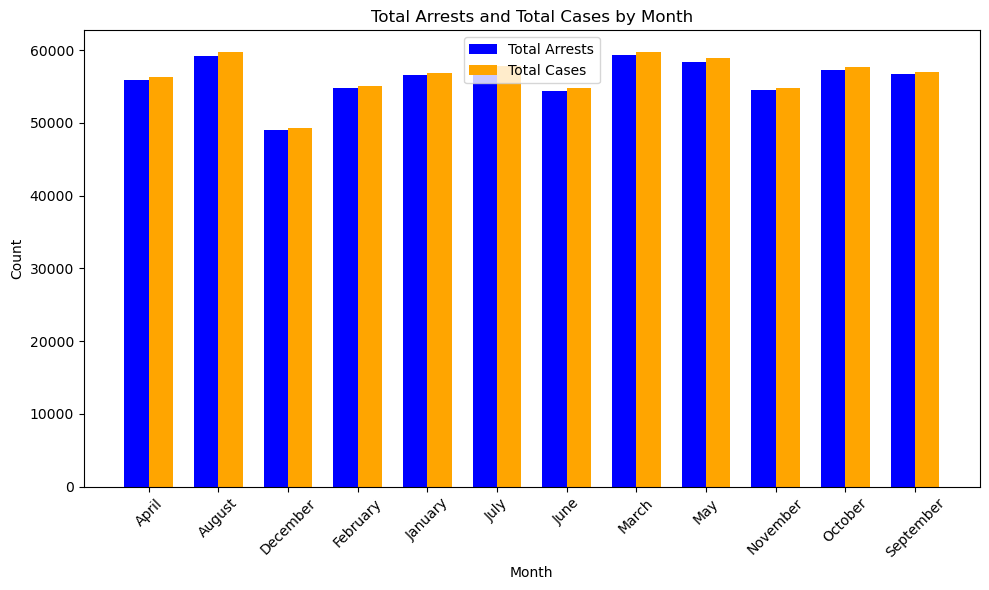

In [45]:
#cyclical/annual drugs trends
drugz_month = drugz.groupby('month').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
drugz_month['pc_arrests'] = drugz_month['total_arrests'] / drugz_month['total_cases']
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(drugz_month))

ax.bar(index, drugz_month['total_arrests'], bar_width, label='Total Arrests', color='blue')
ax.bar([i + bar_width for i in index], drugz_month['total_cases'], bar_width, label='Total Cases', color='orange')

ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Total Arrests and Total Cases by Month')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(drugz_month['month'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

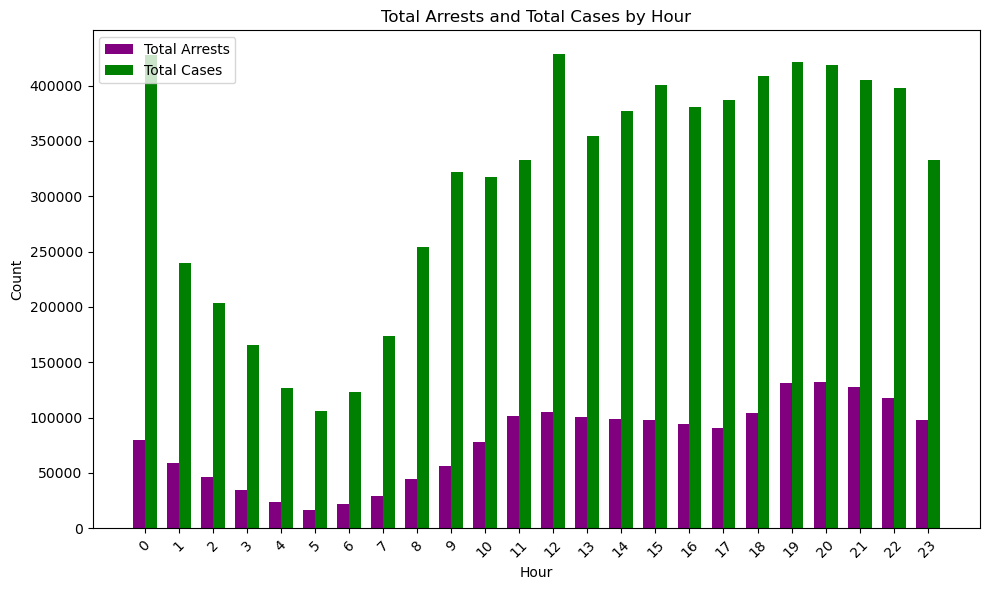

In [46]:
#cyclical/daily crime trends
crime_time = crime.groupby('time').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
crime_time['pc_arrests'] = crime_time['total_arrests'] / crime_time['total_cases']
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(crime_time))

ax.bar(index, crime_time['total_arrests'], bar_width, label='Total Arrests', color='purple')
ax.bar([i + bar_width for i in index], crime_time['total_cases'], bar_width, label='Total Cases', color='green')

ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Total Arrests and Total Cases by Hour')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(crime_time['time'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

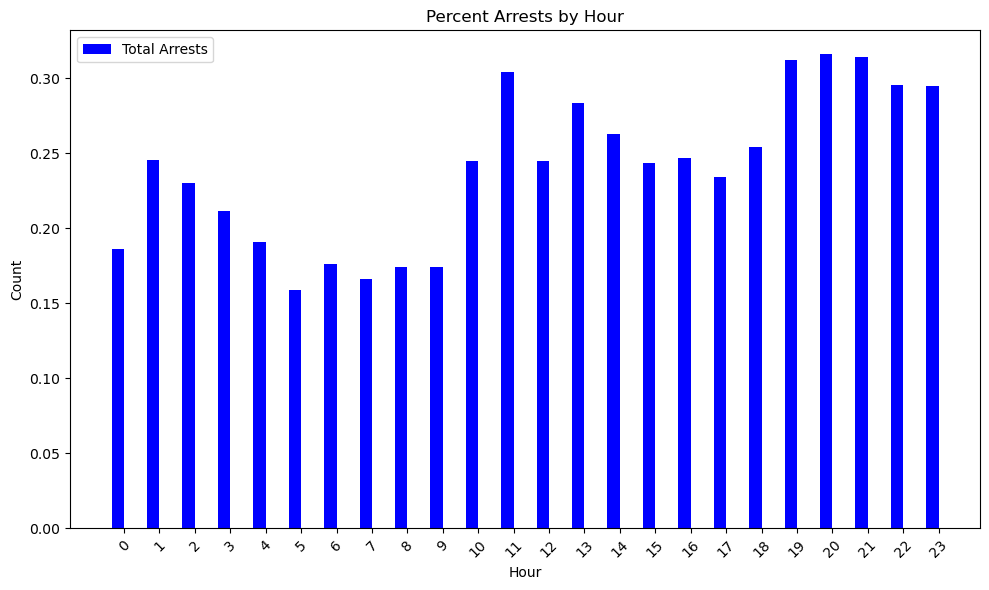

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(crime_time))

ax.bar(index, crime_time['pc_arrests'], bar_width, label='Total Arrests', color='blue')

ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Percent Arrests by Hour')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(crime_time['time'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

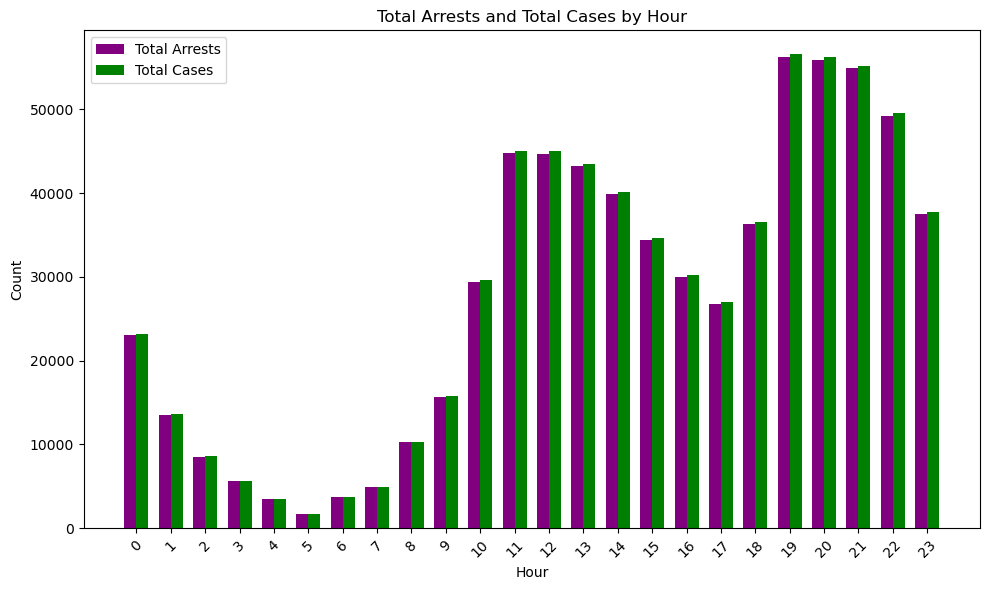

In [48]:
#cyclical/daily drugs trends
drugz_time = drugz.groupby('time').agg(
    total_cases=('ID', 'size'), 
    total_arrests=('Arrest', 'sum'),
).reset_index()
drugz_time['pc_arrests'] = drugz_time['total_arrests'] / drugz_time['total_cases']
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(drugz_time))

ax.bar(index, drugz_time['total_arrests'], bar_width, label='Total Arrests', color='purple')
ax.bar([i + bar_width for i in index], drugz_time['total_cases'], bar_width, label='Total Cases', color='green')

ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Total Arrests and Total Cases by Hour')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(drugz_time['time'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

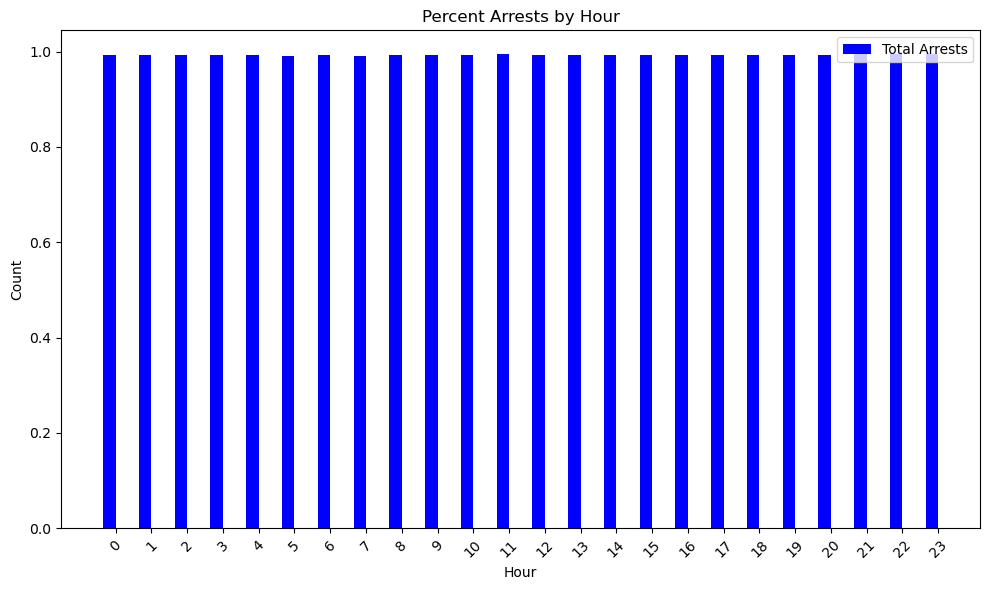

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = range(len(drugz_time))

ax.bar(index, drugz_time['pc_arrests'], bar_width, label='Total Arrests', color='blue')

ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Percent Arrests by Hour')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(drugz_time['time'])
ax.legend()
#add error bar!

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Crafting a classification model to predict arrests- on whole crime dataset! 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import sklearn
from sklearn.inspection import PartialDependenceDisplay
crime_col_list = ['month', 'time', 'Community Area', 'Primary Type']
X = crime[crime_col_list]
y = crime['Arrest']

preprocessor = ColumnTransformer(
    transformers=[
        ('month', OneHotEncoder(), ['month']),
        ('primary_type', OneHotEncoder(), ['Primary Type']),
        ('num', SimpleImputer(strategy='mean'), ['time', 'Community Area'])
    ])

clf = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=4)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', clf)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

pipeline.fit(X_train, y_train)

score = pipeline.score(X_test, y_test)

cv_score = cross_val_score(pipeline, X_train, y_train, cv=10)

print(f"Test Score: {score}")
print(f"Cross-validation mean score: {cv_score.mean()}")

Test Score: 0.8623784939671957
Cross-validation mean score: 0.861896068253684


Accuracy score: 0.8623784939671957


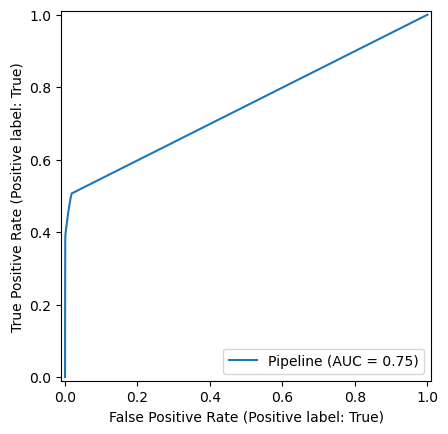

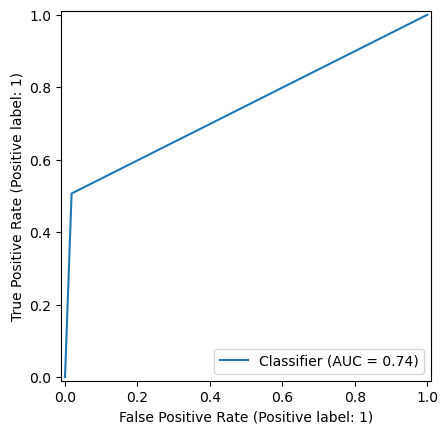

In [51]:
RocCurveDisplay.from_estimator(pipeline, X_test, y_test)

y_pred = pipeline.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

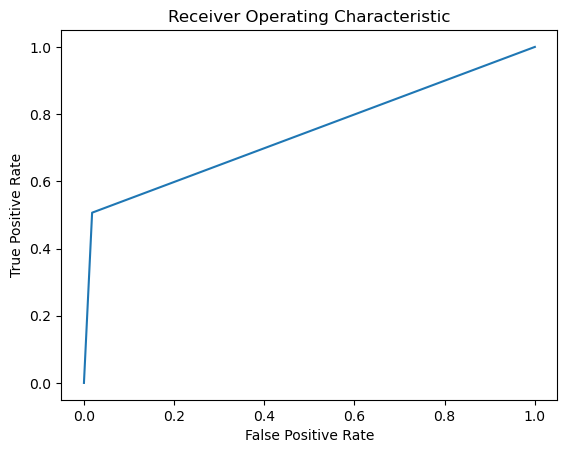

<Figure size 15000x9000 with 0 Axes>

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

tree_classifier = pipeline.named_steps['classifier']

plt.figure(figsize=(25,15), dpi=600)
plt.show()

In [53]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       False     0.8556    0.9819    0.9144   1853795
        True     0.9038    0.5067    0.6493    622831

    accuracy                         0.8624   2476626
   macro avg     0.8797    0.7443    0.7819   2476626
weighted avg     0.8677    0.8624    0.8477   2476626



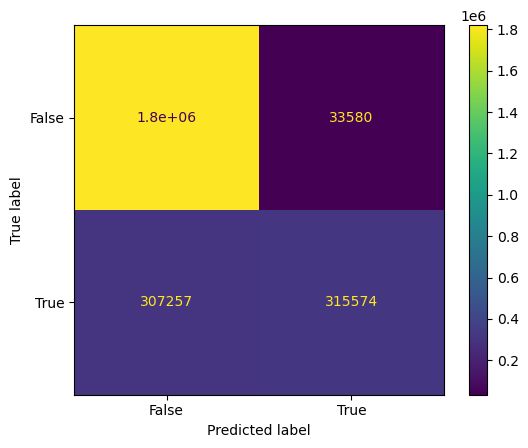

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [56]:
#more cool things I would do if I had the time:
#make the classification model more sophisticated and maybe try out randomforest
#make the hotspot maps slide over time (to see how they move)
#rerun some things without taking out the NAN values for location
#maybe do a per capita analysis? 
#make the hotspot maps have a filter so you can filter by crime...
#look at the specific types of drugs